<a href="https://colab.research.google.com/github/dolmani38/drift/blob/main/Concept%20drift%EC%97%90%20%EC%9D%98%ED%95%9C%20%EB%AA%A8%EB%8D%B8%EC%9D%98%20%EC%84%B1%EB%8A%A5%20%EC%B6%94%EC%A0%95%20%EB%B0%A9%EB%B2%95_1108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concept drift로 인한 모델 성능 저하의 정량적 추정 방법 <br>

Quantitative performance estimation method for model performance degradation due to concept drift

# 1. Introduction

*   기계학습은 Trainset에 의해 모델을 구축한 후, Testset을 사용하여 성능을 측정한다.
*   통상, 측정된 성능값은 해당 모델을 대변하는 성능 지표가 된다.
*   이렇게 구축된 모델은 live data (online data)를 입력해서 실 활용하게 되는데, 이때 초기에 측정한 성능을 지속하여 확보하고 있는지 운영 중에 성능을 실측하여 관리하기는 업무적으로 특수한 case 제외하고 매우 어렵다.
*   시계열 Regression의 경우, 예측 기간의 도래 이후, 실측 Y값을 알 수 있으나 역시 업무에 따라 그 시간 간격이 크게 발생 할 수 있으며, classification의 경우, 예측 class가 정확한지 실측하기 위해서는 live data에 대해 별도의 labeling 작업을 해야 한다.
*   이러한 이유로 실제 운영 중 모델 성능 관리가 간과되고 있으며, 이로 인해 경영상의 문제를 초래 할 수 있다.
*   이상의 이슈를 극복하기 위해, concept drift의 통계량을 측정하여 모델의 성능 상태를 유추하는 연구들이 이루어져 왔지만, concept drift의 측정값 (통계량)을 통해 직접적으로 성능을 예측하는 연구는 희박하다.
*   이번 연구에서는 concept drift의 측정값 (통계량)을 통해 직접적으로 precision 성능을 예측하는 성능 예측 모델(PPM, Performance prediction model)을 제안한다. 
* 이를 통해, 실제 비즈니스 환경에서 live data (online data)의 drift 상태를 통해 현재 모델의 성능을 정량적으로 추정하고 직관적인 모델 성능 관리가 이루어 질 수 있도록 한다.












# 2. 이론적 배경

* LaTex  :https://deep.chulgil.me/ibmunjareul-wihan-gico/ 
* https://www.cmor-faculty.rice.edu/~heinken/latex/symbols.pdf

* Trainset으로 모델을 학습한 이후, 시간이 경과하면, live data는 어떠한 사회, 문화, 환경적 요인에 의해 그 특성과 분포가 변화하게 된다.
* 이때문에 학습 시점의 모델 성능을 유지할 수 없게된다.
* 학습이후 이러한 현상은 Data Drift, Concept Drift로 설명할 수 있으나, 이를 학습시점의 상황으로 보면, Trainset과 Testset의 Distribution이 상이한 Covariate shift (Geeta Dharani. Y; Nimisha G Nair; Pallavi Satpathy; Jabez Christopher "Covariate Shift: A Review and Analysis on Classifiers", 2019 Global Conference for Advancement in Technology (GCAT))의 상황으로 설명할 수 있다.
* 따라서, Covariate Shift 상황의 학습 방법에 대한 연구들을 통해, 모델 성능 추정 방법을 도출하고자 한다.

* (https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.427.8969&rep=rep1&type=pdf)

* covariate shift의 문제에서 먼저, Trainset을 다음과 같이 정의한다.  
$$
X_L = \{x_1, . . . , x_m\}, Y_L = \{y_1, . . . , y_m\}
\tag{1}
$$
이때 x의 distribution, 즉 trainset의 distribution을 p(x|λ) 이라 한다.
* 이제, covariate shift 상황의 Testset을 다음과 같이 정의한다.
$$ 
X_T = \{x_{m+1}, . . . , x_{m+n}\}, Y_T = \{y_{m+1}, . . . , y_{m+n}\}
\tag{2}
$$
* 위의 testset의 distribution을 p(x|θ) 이라 한다.
* (Hidetoshi Shimodaira, "Improving predictive inference under covariate shift by weighting the log-likelihood function", Journal of Statistical Planning and Inference 90 (2000) 227–244)에 의하면 위의 조건에 대한 covariate shift의 학습은 아래의 식을 성립한다.

$$
E_{(x,y)\simθ}[l(f(x),y)] = E_{(x,y)\simλ}[\dfrac{p(x|θ)}{p(x|λ)} l(f(x),y)]
\tag{3}
$$
* 식(3)에서 l(f(x),y)은 모델 f(x)의 loss function을 의미한다.
* 식(3)은 loss 의 scale조정에 의해 covariate shift을 보정할 수 있는 관계식이다.
* 식(3)을 Drift 상황으로 일반화 해서 성능 관계식으로 바꾼다.  
* f(x)를 일반적인 수치예측 (regression)이라 가정하면
$$
l_{squared}(f(x),y) = (y − f(x))^2
\tag{4}
$$
* 식(3)에 식(4)를 대입하여 정리하면,
$$
E_{(x,y)\simθ}[(y − f(x))^2] = E_{(x,y)\simλ}[\dfrac{p(x|θ)}{p(x|λ)}(y − f(x))^2]
\tag{5}
$$
* 여기서 Expactaion의 연산 정리(https://blog.naver.com/mykepzzang/220837877074)에 의해 E(XY)=E(X)E(Y)를 대입하여
$$
E_{(x,y)\simθ}[(y − f(x))^2] = E_{(x,y)\simλ}[\dfrac{p(x|θ)}{p(x|λ)}]E_{(x,y)\simλ}[(y − f(x))^2]
\tag{6}
$$
와 같이 나타낼 수 있으며,
$$
E_{(x,y)\simθ}[(y − f(x))^2] = Testset의 MSE(Mean Square Error)
$$
이고
$$
E_{(x,y)\simλ}[(y − f(x))^2] = Trainset의 MSE(Mean Square Error)
$$
이기 때문에, 
* 식(6)을 정리하면,
$$
MSE_{testset} = E_{(x,y)\simλ}[\dfrac{p(x|θ)}{p(x|λ)}]MSE_{trainset}  
\tag{7}
$$ 
* 식(7)을 통해, testset(live data)의 성능은 trainset의 성능(최초 측정 성능)과 trainset, testset의 distribution의 관계식이 성립함을 알 수 있다.


# 3. Proposed Method

## pseudo code

--------------------------------------------------------------------------------
**Step1 : performance modeling**

--------------------------------------------------------------------------------
&nbsp;&nbsp;1:&nbsp;&nbsp;$L_{trainset} =  \{ Y_L, X_L\} $ #이하 간략히 $L$ 로 표기 <br>

&nbsp;&nbsp;2:&nbsp;&nbsp;$L_{testset} =  \{ Y_T, X_T\} $<br>
&nbsp;&nbsp;3:&nbsp;&nbsp;$f(x,L) = train(Y_L, X_L)$ <br>
&nbsp;&nbsp;4:&nbsp;&nbsp;$base\_score = score(f(X_T,L),Y_T)$<br>
&nbsp;&nbsp;5:&nbsp;&nbsp;$For$ number_of_sample $do $<br>
&nbsp;&nbsp;6:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Y_b, X_b = block\_sampling(Y_L, X_L, sampling\_ratio)$<br>
&nbsp;&nbsp;7:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$X_b = noise\_injection(X_b,noise\_intensity)$<br>
&nbsp;&nbsp;8:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$drift = adjusted\_ks\_test(X_L, X_b)$<br>
&nbsp;&nbsp;9:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\Delta score\_array \leftarrow (base\_score - score(f(X_b,L),Y_b))$<br>
10:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$drift\_array \leftarrow drift$ <br>
11:&nbsp;&nbsp;$end$ <br>
12:&nbsp;&nbsp;$ppm(d) = train(\Delta score\_array, drift\_array)$

--------------------------------------------------------------------------------
**Step2 : adjust scale**

--------------------------------------------------------------------------------

1:&nbsp;&nbsp;$For$ number_of_sample $do$<br>
2:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Y_b, X_b = block\_sampling(Y_T, X_T, sampling\_ratio)$<br>
3:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$drift = adjusted\_ks\_test(X_L, X_b)$<br>
4:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\Delta score\_array_{predicted} \leftarrow ppm(drift)$<br>
5:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\Delta score\_array_{real} \leftarrow (base\_score - score(f(X_b,L),Y_b))$<br>
6:&nbsp;&nbsp;$end$<br>
7:&nbsp;&nbsp;$adjusted\_scale = \dfrac{var(\Delta score\_array_{real})}{var(\Delta score\_array_{predicted})}$

--------------------------------------------------------------------------------
**Step3 : apply perfomance_model**

--------------------------------------------------------------------------------

1:&nbsp;&nbsp;$l_{Input\_live\_data} =\{ X_l\}$ # live data에는 Y가 존재하지 않는다.<br>
2:&nbsp;&nbsp;$drift = adjusted\_ks\_test(X_L, X_l)$ <br>
3:&nbsp;&nbsp;$score_{predicted} = base\_score - adjusted\_scale * ppm(drift)$

* block sampling 에 대하서는 https://github.com/dolmani38/drift/blob/main/drift_sampling_0813.ipynb 참고!

## 설명

성능 예측 대상의 모델을 $f(x,L)$이라 할 때,

trainset과 testset은 $f(x,L)$의 학습 및 성능 측정을 위해 활용된 데이터에 해당.<br>
testset을 통하여 $f(x,L)$의 성능, base_score이 측정되었다.

<b>Step1 : 성능 모델링 단계</b> <br>
1. trainset에 대하여 random size로 블럭 샘플링 (block sampling)을 한다.
2. 샘플링된 $X_b$의 일부에 Noise를 주입하여 drift를 유도한다.
3. trainset($X_L$)과 drift유도된 Sample($X_b$)에 대해 변경된 Kolmogorov–Smirnov test를 하여, drift 통계량(Kolmogorov–Smirnov statistic)을 취득한다.
4. 이때, 변경된 KS Test는 기존의 KS Test의 식(8)에서 식(9)와 같이 변경하여 적용한다.

$$
\begin{align}
D_n = {sup}_x |F_n(x) - F(x)|
\tag{8}
\end{align}
$$

$$
\begin{align}
D_n = {sup}_x (F_n(x) - F(x))
\tag{9}
\end{align}
$$

5. 식(9)와 같이 절대값를 제거하므로 성능에 대한 drift 통계량의 설명력을 높인다.
6. drift유도된 Sample에 대하여 $f(x,L)$의 성능편차($\Delta score$)를 $\Delta score\_array$에 저장한다.
7. drift통계량을 $drift\_array$에 저장한다.
8. 1~7까지의 과정을 반복하여 drift에 대한 성능 편차 dataset를 생성한다.
9. drift에 대한 성능 편차 dataset을 통해, $ppm(d)$ 을 학습한다.


<b>Step2 : scale 조정 단계 </b><br>
Step1에서 $X_b$의 일부를 임의 치환하여 drift를 유도하였으므로 drift에 의한 성능 편차($\Delta score$)는 실제 drift에서 발생하는 편차와 scale이 다를 수 있다. 이를 조정하기 위해 testset을 통해, 그 Scale을 측정한다.
1. testset($Y_T,X_T$)에 대하여 random size로 블럭 샘플링(block sampling)을 한다.
2. trainset과 testset에서 추출된 Sample에 대해 변경된 Kolmogorov–Smirnov test를 하여, drift 통계량을 취득한다.
3. Step1에서 학습된 $ppm(d)$을 통해, 예측 성능 편차($\Delta score_{predicted}$)를 구하여 $\Delta score\_array_{predicted}$에  저장한다.
4. testset에서 추출된 Sample($Y_b,X_b$)에 대해 $f(x,L)$의 실 성능 편차($\Delta score_{real}$)를 구하여 $\Delta score\_array_{real}$에 저장한다.
5. 1~4의 과정을 반복하여 예측 성능 편차 dataset과 실 성능 편차 dataset을 생성한다.
6. 예측 성능 편차 dataset과 실 성능 편차 dataset의 분산을 비교하여 보정 Scale 값을 구한다.

<b>Step3 : $ppm(d)$의 적용 단계</b><br>
1. 일정기간 축적한 실 dataset ($X_l$)를 취득한다.
2. trainset($X_L$)과 실 dataset ($X_l$)에 대해 변경된 Kolmogorov–Smirnov test를 하여, drift통계량을 취득한다.
3. $ppm(d)$을 통해 예측 성능 편차($\Delta score _{predicted}$)를 구하고 보정 Scale 값을 곱한 후 base_score 에서 빼서 예측 성능값($score_{predicted}$)을 구한다. 


# 4. 실험 계획

*   Data
1. Personal Loan Data
> 미국의 개인 대출 기업 ‘Lending Club’의 공개 데이터 사용<BR>
> 2007~2017년까지 총 2,260,701건의 데이터, 대출 건당 실제 ‘default’ 여부 포함
151개 Column<BR>
> 데이터 정제 후, 81개 Features, 120만건 사용<BR>
>> trainset : 11,497건 (2010년)<BR>
>> online dataset : 1,268,183건 (2011~2017년)<BR>

2. Credit Card Transaction Data
> This data has more than 20 million transactions generated from a multi-agent virtual world simulation performed by IBM. 
> The data covers 2000 (synthetic) consumers resident in the United States, but who travel the world. 
> The data also covers decades of purchases, and includes multiple cards from many of the consumers. 
>> trainset : 37,301건 (2007년, 1/30 축소)<BR>
>> online dataset : 90,836건 (2008~2009년, 1/30 축소)<BR>

* 예측 알고리즘
> Random-forest for Personal Loan Data<BR>
> Catboost for Credit Card Transaction Data

* 성능 예측 알고리즘
> Ordinary Least Squares regression

* 실험의 변수
> feature_count (order of importance)<br>
> sampling_ratio (size) = 0.05 ~ 0.95, 0.20 ~ 0.80, 0.40 ~ 0.60<BR>
> stdev_ratio = 1, 2, 3<BR>

* 측정 지표
> 예측 알고리즘의 성능 지표 : precision<BR>
> PPM의 성능 지표<BR>
    >>mean_absolute_error<br>
    >>root_mean_square_error<br>
    >>mean_absolute_percentage_error<br>
    >>R_square<br>


# 5. 실험을 위한 기본 준비 

In [1]:
if True:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import random
np.random.seed(1337)

In [3]:
def seed_everything(seed: int = 46):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(seed)
    

# 6. Main 알고리즘 (Performance predit model) 구현 class

In [4]:
# https://towardsdatascience.com/comparing-sample-distributions-with-the-kolmogorov-smirnov-ks-test-a2292ad6fee5

from scipy import stats
import sys
import math
if sys.version_info >= (3, 5):
    from math import gcd
else:
    from fractions import gcd

from scipy.stats import ks_2samp, kstest
import statsmodels.api as sm # import statsmodels 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
import random
from statistics import mean
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

class MPP:
    def __init__(self,predict,column_names,importances ,y_ref,x_ref,y_inf,x_inf,scaler=None,verbose=False):
        self.predict = predict
        self.scaler = scaler
        self.y_ref = y_ref
        self.x_ref = x_ref
        self.y_inf = y_inf
        self.x_inf = x_inf
        self.COLUMNS = column_names
        self.verbose = verbose
        importances = importances/sum(importances)

        self.l = []
        for x,(c,i) in enumerate(zip(column_names,importances)):
            self.l.append((c,i,x))
        self.l.sort(key = lambda x: x[1],reverse=True) 

        self.df_stat = pd.DataFrame({"mean":np.mean(x_ref,axis=0),"std":np.std(x_ref,axis=0)},index=column_names)

    def split_sample(self,yy,xx,train_size = 0.7, middle_offset = False):
        size = xx.shape[0]
        offset = int(size*train_size)
        mo = 0
        if middle_offset:
            mo = int(random.random() * (size - offset))
            #print(mo)

        x_ref1 = xx[mo:mo+offset]
        y_ref1 = yy[mo:mo+offset]
        x_inf1 = np.concatenate([xx[0:mo], xx[mo+offset:]], axis=0)
        y_inf1 = np.concatenate([yy[0:mo],yy[mo+offset:]], axis=0)

        return y_ref1,x_ref1,y_inf1,x_inf1 

    def __ks_2samp2(self,sample1, sample2):
        # Gets all observations
        sample1 = np.sort(sample1)
        sample2 = np.sort(sample2)
        n1 = sample1.shape[0]
        n2 = sample2.shape[0]   
        data_all = np.concatenate([sample1, sample2])
        cdf1 = np.searchsorted(sample1, data_all, side='right') / n1
        cdf2 = np.searchsorted(sample2, data_all, side='right') / n2
        # Evaluates the KS statistic
        cddiffs = cdf1 - cdf2
        minS = -np.min(cddiffs)
        maxS = np.max(cddiffs)
        ks_stat =  max(minS, maxS)
        
        if ks_stat == minS:
            ks_stat = -ks_stat
        
        # Calculates the P-Value based on the two-sided test
        # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
        m, n = float(n1), float(n2)
        en = m * n / (m + n)
        p_value = 0.0 #stats.kstwobign.sf(math.sqrt(en) * abs(ks_stat))
        #p_value = stats.kstwobign.sf(en * abs(ks_stat))
        return ks_stat,p_value
    
    def __ks_drift(self,ref_x,inf_x):
        x_drift = np.zeros((ref_x.shape[1],2))
        for i in range(ref_x.shape[1]):
            #s, p = ks_2samp(ref_x[:,i],inf_x[:,i],mode='asymp')
            s, p = self.__ks_2samp2(ref_x[:,i],inf_x[:,i])
            x_drift[i,0] = s
            x_drift[i,1] = p
        return x_drift

    def __getImportanceColumnNameTop(self,prefix="", top=5):
        return [prefix+w for w in np.asarray(self.l[0:top])[:,0]]

    def __getImportanceIndexTop(self,top=5):
        return [int(w) for w in np.asarray(self.l[0:top])[:,2]]    


    def drift_sampling(self,sampling_sigma=0.95,permutaion_sigma=1,epoch = 100,TOP=5):

        self.itc = self.__getImportanceColumnNameTop(prefix="",top=TOP)
        self.toplist = self.__getImportanceIndexTop(top=TOP)

        if self.verbose:
            print(self.itc)
            print("sampling_sigma:",sampling_sigma)
            print("permutaion_sigma:",permutaion_sigma)
        
        if self.scaler is not None:
            self.base_score = precision_recall_fscore_support(y_inf, self.predict(self.scaler.transform(x_inf)),average='binary')
        else:
            self.base_score = precision_recall_fscore_support(y_inf, self.predict(x_inf),average='binary')

        if self.verbose:
            print("base_score:",base_score)
        metric_a= []
        metric_b= []
        metric_c= []
        drift_data_ks_stats = []
        drift_data_ks_pvals = []
        drift_data_ks_stats_diff = []
        drift_data_ks_pvals_diff = []     
        raw_drift = []
        for i in range(epoch):
            #y_ref_d, _, x_ref_d, _ = train_test_split(y_ref, x_ref, train_size=0.10, random_state=i)
            y_inf_d, x_inf_d, _, _ = self.split_sample(self.y_ref.copy(), self.x_ref.copy(), train_size=random.uniform(1-sampling_sigma,sampling_sigma),middle_offset = True)
            
            # before permutation
            o_drift = self.__ks_drift(self.x_ref[:,self.toplist], x_inf_d[:,self.toplist])

            if self.scaler is not None:
                acc1 = precision_recall_fscore_support(y_inf_d, self.predict(self.scaler.transform(x_inf_d)),average='binary')
            else:
                acc1 = precision_recall_fscore_support(y_inf_d, self.predict(x_inf_d),average='binary')

            #permutation for x_inf_d
            #for v in self.toplist:
            p1 = random.random()
            nums = np.random.choice([0, 1], size=x_inf_d.shape[0], p=[1-p1, p1])            
            v = random.choice(self.toplist)
            x_inf_d[:,v] = x_inf_d[:,v] + np.random.normal(0, self.df_stat['std'][v]*permutaion_sigma, x_inf_d.shape[0])*nums

            if self.scaler is not None:
                acc = precision_recall_fscore_support(y_inf_d, self.predict(self.scaler.transform(x_inf_d)),average='binary')
            else:
                acc = precision_recall_fscore_support(y_inf_d, self.predict(x_inf_d),average='binary')

            if acc[0] >0 and self.base_score[0] > acc[0]:
                x_drift = self.__ks_drift(self.x_ref[:,self.toplist], x_inf_d[:,self.toplist])
                #sumo = np.sum((o_drift[:,0]))
                sumd = np.sum((x_drift[:,0]))
                #sump = np.sum(x_drift[:,1])
                raw_drift.append(o_drift[:,0])
                #drift_ratio2.append(x_drift[:,0])
                print(f"\r{i+1}/{epoch} acc:{acc[0]:.4f} {acc[1]:.4f} {acc[2]:.4f} sum:{sumd:.4f}", end="", flush=True)
                metric_a.append([acc[0]/self.base_score[0],acc[1]/self.base_score[1],acc[2]/self.base_score[2]])
                metric_b.append([(self.base_score[0] - acc[0]),(self.base_score[1] - acc[1]),(self.base_score[2] - acc[2])])
                metric_c.append([acc[0],acc[1],acc[2],acc1[0]])
                drift_data_ks_stats.append(x_drift[:,0])
                drift_data_ks_pvals.append(x_drift[:,1])
                #drift_data_ks_pvals.append([1 if a < 0.05 else 0 for a in x_drift[:,1]]) # x_drift[:,1])   
                #drift_data_ks_stats_diff.append(base_drift[:,0]*(1-base_drift[:,1]) - x_drift[:,0]*(1-x_drift[:,1]))
                drift_data_ks_pvals_diff.append([1 if a < 0.05 else 0 for a in x_drift[:,1]]) 

        metric_a = np.asarray(metric_a)
        metric_b = np.asarray(metric_b)
        metric_c = np.asarray(metric_c)        
        drift_data_ks_stats = np.asarray(drift_data_ks_stats)
        drift_data_ks_pvals = np.asarray(drift_data_ks_pvals)    
        drift_data_ks_stats_diff = np.asarray(drift_data_ks_stats_diff)
        drift_data_ks_pvals_diff = np.asarray(drift_data_ks_pvals_diff)


        # pericision의 distribution
        # plotting two histograms on the same axis
        alary = np.concatenate((metric_c[:,0],metric_c[:,3]))
        min = np.min(alary)
        max = np.max(alary)
        if self.verbose:
            plt.hist(metric_c[:,3], bins = 20, alpha=0.45, color='red',range=(min,max))
            plt.hist(metric_c[:,0], bins = 20, alpha=0.45, color='blue',range=(min,max))
            plt.title("distribution of pericision")
            plt.legend(['raw pericision','permuted pericision'])        
            plt.show()

        alary = np.concatenate((np.asarray(raw_drift)[:,0],drift_data_ks_stats[:,0]))
        min = np.min(alary)
        max = np.max(alary)
        if self.verbose:
            plt.hist(np.asarray(raw_drift)[:,0], bins = 20 , alpha=0.45, color='red',range=(min,max))
            plt.hist(drift_data_ks_stats[:,0], bins = 20 , alpha=0.45, color='blue',range=(min,max))
            plt.title("distribution of drift (most important feature)")
            plt.legend(['raw drift','permuted drift'])              
            plt.show()

            plt.figure(figsize=(20,5))
            plt.plot(drift_data_ks_stats[:,0])
            plt.title("plot of drift (most important feature)")
            plt.show()

        """
        drift_ratio1 = np.asarray(drift_ratio1)
        drift_ratio2 = np.asarray(drift_ratio2)

        drift_ratio = []
        for s in range(len(toplist)):
            drift_ratio.append(sum(abs(drift_ratio2[:,s]))/sum(abs(drift_ratio1[:,s])))
        """
        return  metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,y_ref.shape[0]

    def build_performance_model(self,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff):
        dx = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=self.COLUMNS[self.toplist])
        #dx['intercept'] = 1
        #dx = trainset
        if self.verbose:
            print(dx.shape)

        self.model = sm.OLS(metric_c[:,0], dx).fit() ## sm.OLS(output, input)
        # Print out the statistics
        if self.verbose:
            print(self.model.summary())

    def __reject_outliers_2(self,data, m=1.64):
        data = np.asarray(data)
        mean = np.mean(data)
        if self.verbose:
            print("\nraw MDR",mean,len(data))
        standard_deviation = np.std(data)
        distance_from_mean = abs(data - mean)
        max_deviations = m
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = data[not_outlier]
        if self.verbose:
            print(len(data))
        """
        stdev = np.std(data)
        mean = np.mean(data)
        maskMin = mean - stdev * m
        maskMax = mean + stdev * m
        mask = np.ma.masked_outside(data, maskMin, maskMax)
        #print('Masking values outside of {} and {}'.format(maskMin, maskMax))
        """
        return no_outliers

    def getMDR(self, zscore=0.7):
        drift_array = []
        real_array = []
        predicted_array = []
        acc_infs = []
        ssize = int(self.y_inf.shape[0] * 0.5)
        step=int(ssize/1000)
        if self.verbose:
            print("size,step:",ssize,step)
        epoch = 1000
        if step == 1:
            epoch = ssize        
        for i in range(epoch):
            #y_inf_d,x_inf_d, _, _ = self.split_sample(self.y_inf, self.x_inf, train_size=0.5,middle_offset = True)
            if (i*step)+ssize >= self.y_inf.shape[0]:
                break
                
            #y_inf_d = self.y_inf[(i*step):(i*step)+ssize]
            #x_inf_d = self.x_inf[(i*step):(i*step)+ssize]
            y_inf_d, x_inf_d, _, _ = self.split_sample(self.y_inf.copy(), self.x_inf.copy(), train_size=random.uniform(0.05,0.95),middle_offset = True)
            
            inf_drift = self.__ks_drift(self.x_ref[:,self.toplist], x_inf_d[:,self.toplist])

            dd = np.asarray(inf_drift[:,0]*[1 if a < 0.05 else 0 for a in inf_drift[:,1]]).reshape(1,-1)
            # add intercept term
            #intc = np.ones((dd.shape[0],1))
            #dd = np.concatenate((dd,intc),axis=1)

            acc_delta = self.model.predict(dd)[0]

            if self.scaler is not None:
                acc_real = precision_recall_fscore_support(y_inf_d, self.predict(self.scaler.transform(x_inf_d)),average='binary')
            else:
                acc_real = precision_recall_fscore_support(y_inf_d, self.predict(x_inf_d),average='binary')

            # 실 precision / 예측 precision 
            acc_predict = self.base_score[0] - acc_delta
            precision_ratio = acc_real[0] / acc_predict
            #if delta > 0 and acc_inf > 0:
            acc_infs.append(precision_ratio)
            drift_array.append(inf_drift[:,0])
            real_array.append(acc_real[0])
            predicted_array.append(acc_predict)

            print(f"\r{i+1}/{epoch} drift1:{inf_drift[0,0]} real_acc:{acc_real[0]} predict_acc:{acc_predict} delta_ratio:{precision_ratio:.4f}", end="", flush=True)

        #acc_infs = self.__reject_outliers_2(acc_infs).mean()
        acc_infss = self.__reject_outliers_2(acc_infs,zscore)
        if self.verbose:
            plt.hist(acc_infss, bins = 20)
            plt.title("distribution of delta ratio for real delta precision vs predicted delta precision, remove outlier (50%)")
            plt.show()

        mdr = np.mean(acc_infss)
        #mdr = mean(acc_infs)
        if self.verbose:
            print("\nMDR:",mdr)
        
        real_var = self.__reject_outliers_2(real_array)
        real_dist = np.max(real_var) - np.min(real_var)

        pred_var = self.__reject_outliers_2(predicted_array)
        pred_dist = np.max(pred_var) - np.min(pred_var)
        """
        real_dist = np.std(real_array)
        pred_dist = np.std(predicted_array)
        """
        dist_ratio = real_dist/pred_dist
        if self.model.params[0] < 0:
            dist_ratio = -dist_ratio
        if self.verbose:
            print(f"real_dist:{real_dist}, pred_dist{pred_dist}, dist_ratio:{dist_ratio}")

        alary = np.concatenate((real_array,predicted_array))
        min = np.min(alary)
        max = np.max(alary)

        if self.verbose:
            plt.hist(real_array, bins = 20, alpha=0.45, color='red',range=(min,max))
            plt.hist(predicted_array, bins = 20, alpha=0.45, color='blue',range=(min,max))
            plt.title("distribution of delta pericision")
            plt.legend(['real delta pericision','predicted delta pericision'])        
            plt.show()

            plt.hist(np.asarray(drift_array)[:,0], bins = 20)
            plt.title("distribution of drift (most important feature)")
            plt.show()

            plt.figure(figsize=(20,5))
            plt.plot(real_array, color='red')
            plt.plot(predicted_array, color='blue')
            plt.title("plot of delta pericision")
            plt.legend(['real delta pericision','predicted delta pericision'])    
            plt.show()

            plt.figure(figsize=(20,5))
            plt.plot(np.asarray(drift_array)[:,0])
            plt.title("plot of drift (most important feature)")
            plt.show()

        return mdr,dist_ratio*4

    def build_second_performance_model(self):
        scnd_y = []
        scnd_x = []
        
        ssize = int(self.y_inf.shape[0] * 0.5)
        step=int(ssize/1000)
        if self.verbose:
            print("size,step:",ssize,step)
        epoch = 1000
        if step == 1:
            epoch = ssize
        for i in range(epoch):
            #y_inf_d,x_inf_d, _, _ = self.split_sample(self.y_inf, self.x_inf, train_size=0.5,middle_offset = True)
            if (i*step)+ssize >= self.y_inf.shape[0]:
                break
                
            y_inf_d = self.y_inf[(i*step):(i*step)+ssize]
            x_inf_d = self.x_inf[(i*step):(i*step)+ssize]

            inf_drift = self.__ks_drift(self.x_ref[:,self.toplist], x_inf_d[:,self.toplist])
            dd = inf_drift[:,0]*[1 if a < 0.05 else 0 for a in inf_drift[:,1]]
            acc_inf = self.model.predict(dd)[0]
            if self.scaler is not None:
                acc = precision_recall_fscore_support(y_inf_d, self.predict(self.scaler.transform(x_inf_d)),average='binary')
            else:
                acc = precision_recall_fscore_support(y_inf_d, self.predict(x_inf_d),average='binary')
            
            scnd_x.append([acc_inf]) #+[d for d in dd])
            scnd_y.append(acc[0])
            print(f"\r{i+1}/{epoch} acc:{acc[0]} {acc_inf}", end="", flush=True)

        self.scnd_model = sm.OLS(scnd_y, np.asarray(scnd_x)).fit() ## sm.OLS(output, input)
        # Print out the statistics
        if self.verbose:
            print(self.scnd_model.summary())

    def predict_precision_for_PPM(self,y_test2,X_test2,mdr,dist_ratio,window_size = 10000,step = 500):

        df = {}

        drift_d = []
        df['The precision of the model on real data'] = []
        df['Predicted precision'] = []

        beta = 0
        #window_size = 10000
        #step = 500
        batch = math.ceil((X_test2.shape[0]-window_size)/step)
        for i in range(batch):
            ux = X_test2[i*step:i*step+window_size]
            uy = y_test2[i*step:i*step+window_size]
            if self.scaler is not None:
                f1 = precision_recall_fscore_support(uy, self.predict(self.scaler.transform(ux)),average='binary')
            else:
                f1 = precision_recall_fscore_support(uy, self.predict(ux),average='binary')

            X3_drift = self.__ks_drift(self.x_ref[:,self.toplist],ux[:,self.toplist])
            #X3_drift = mean_drift[top_list,0] - X3_drift[:,0]
            drift_d.append(X3_drift[:,0])
            X3_drift = X3_drift[:,0] * [1 if a < 0.05 else 0 for a in X3_drift[:,1]] # *importances[top_list]
            
            #X3_drift = X3_drift[:,0] * (1-X3_drift[:,1]) *importances
            dd = pd.DataFrame(X3_drift.reshape(1,-1),columns=self.COLUMNS[self.toplist])
            # add intercept term
            #dd['intercept'] = 1

            #dd = drift_scaler.transform(dd)
            #acc_c = mean([m.predict(ss.transform(dd))[0][0] for m in  models]) #model_c.predict(dd)[0]
            #acc_c = mean([m.predict(dd)[0][0] for m in  models]) 

            #print(dd.values)
            #print(dd.values/drift_ratio)
            
            # predicted precision
            acc_c = (self.base_score[0] - self.model.predict(dd.values)[0]*dist_ratio) * mdr
            """
            if (acc_c - beta) > base_score[0]:
                beta = (acc_c - beta) - base_score[0]
            
            acc_c =  acc_c - beta
            
            if acc_c - beta > 0:
                beta = beta+ acc_c
            
            acc_c = base_score[0] + acc_c - beta
            """
            
            if beta == 0:
                beta = base_score[0] - acc_c

            acc_c = beta + acc_c
            if self.verbose:
                print(f"{f1[0]} - {acc_c}")
            df['The precision of the model on real data'].append(f1[0])
            df['Predicted precision'].append(acc_c)
            
        
        if self.verbose:
            drift_df = pd.DataFrame(drift_d,columns=self.itc)
            drift_df.plot(title="ks-test statistics of features", legend=True,figsize=(20,5))

        df2 = pd.DataFrame(df)

        return df2


    def predict_precision_for_second_model(self,y_test2,X_test2,window_size = 10000,step = 500):

        df = {}
        df['The precision of the model on real data'] = []
        df['Predicted precision'] = []
        beta = 0
        #window_size = 10000
        #step = 500
        batch = math.ceil((X_test2.shape[0]-window_size)/step)
        for i in range(batch):
            ux = X_test2[i*step:i*step+window_size]
            uy = y_test2[i*step:i*step+window_size]
            if self.scaler is not None:
                f1 = precision_recall_fscore_support(uy, self.predict(self.scaler.transform(ux)),average='binary')
            else:
                f1 = precision_recall_fscore_support(uy, self.predict(ux),average='binary')

            X3_drift = self.__ks_drift(self.x_ref[:,self.toplist],ux[:,self.toplist])
            #X3_drift = mean_drift[top_list,0] - X3_drift[:,0]

            X3_drift = X3_drift[:,0] * [1 if a < 0.05 else 0 for a in X3_drift[:,1]] # *importances[top_list]
            #X3_drift = X3_drift[:,0] * (1-X3_drift[:,1]) *importances
            dd = pd.DataFrame(X3_drift.reshape(1,-1),columns=self.COLUMNS[self.toplist])
            
            acc_c = self.model.predict(dd.values)[0]
            #acc_c = self.scnd_model.predict(np.asarray([acc_c] + [d for d in dd.values[0,:]]).reshape(1,-1))[0]
            acc_c = self.scnd_model.predict(np.asarray([acc_c]).reshape(1,-1))[0]

            if beta == 0:
                beta = self.base_score[0] - acc_c
            acc_c = beta + acc_c

            if acc_c > self.base_score[0]:
                acc_c = self.base_score[0]
            if self.verbose:
                print(f"{f1[0]} - {acc_c}")
            df['The precision of the model on real data'].append(f1[0])
            df['Predicted precision'].append(acc_c)

        df2 = pd.DataFrame(df)

        return df2

    def result_statistics(self,df2):
        MAE = mean_absolute_error(df2['The precision of the model on real data'], df2['Predicted precision'])
        MSE = mean_squared_error(df2['The precision of the model on real data'], df2['Predicted precision']) 
        MAPE = mean_absolute_percentage_error(df2['The precision of the model on real data'], df2['Predicted precision'])
        RMSE = np.sqrt(MSE)
        r_2 = r2_score(df2['The precision of the model on real data'], df2['Predicted precision']) 
        print('')
        print('MAE',MAE)
        print('RMSE',RMSE)
        print('MAPE',MAPE)
        print('R2',r_2)
        #display adjusted R-squared
        #adj_r2 = 1 - (1-r_2)*(df2.shape[0]-1)/(df2.shape[0]-80)
        #print('adj R2',adj_r2)
        return MAE,RMSE,MAPE,r_2        

# 7. loan predict 실험

## 데이터 구축

In [5]:
df_accepted = pd.read_csv("/content/drive/MyDrive/Drift/accepted_2007_to_2018Q4.csv")

print(df_accepted.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2260701, 151)


### 데이터 정제

In [6]:
# for the sake of simplicity, let's consider only Fully Paid and Charged Off values:

df_accepted = df_accepted[df_accepted.loan_status.isin(['Fully Paid', 'Charged Off'])]

print(df_accepted.shape)

(1345310, 151)


In [7]:
cols_to_drop = df_accepted.isnull().sum().sort_values(ascending=False).head(50).index
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1345310, 101)

In [8]:
# maybe we can go further, and eliminate columns up to title:

cols_to_drop = df_accepted.isnull().sum().sort_values(ascending=False).head(45).index
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1345310, 56)

In [9]:
# Remaining columns have missing data points, but they account for less than 0.2% of the total data. Let's remove the rows that are missing those values in those columns with dropna():

df_accepted = df_accepted.dropna()
df_accepted.shape

(1341026, 56)

In [10]:
# These are constant columns. We can drop it either.

cols_to_drop = ['out_prncp', 'out_prncp_inv', 'policy_code']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1341026, 53)

In [11]:
# It seems we have many "duplicated" information. Let's drop some columns, based on visual inspection at corr_pairs dataframe:

cols_to_drop = ['fico_range_low', 'funded_amnt_inv', 'funded_amnt', 'total_pymnt_inv', 'total_pymnt', 'installment', 'collection_recovery_fee', 'total_rec_prncp', 'last_fico_range_low']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1341026, 44)

In [12]:
values = df_accepted.loan_status.unique()
encode = [1,0]
d = dict(zip(values, encode))

df_accepted['loan_paid'] = df_accepted['loan_status'].map(d)

df_accepted = df_accepted.drop(columns=['loan_status'])


In [13]:
df_accepted

,id,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,loan_paid
0,68407277,3600.0,36 months,13.99,C,C4,MORTGAGE,55000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
1,68355089,24700.0,36 months,11.99,C,C1,MORTGAGE,65000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2,68341763,20000.0,60 months,10.78,B,B4,MORTGAGE,63000.0,Not Verified,Dec-2015,...,Joint App,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
4,68476807,10400.0,60 months,22.45,F,F1,MORTGAGE,104433.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
5,68426831,11950.0,36 months,13.44,C,C3,RENT,34000.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,89905081,18000.0,60 months,9.49,B,B2,OWN,130000.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2260690,88948836,29400.0,60 months,13.99,C,C3,MORTGAGE,180792.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2260691,89996426,32000.0,60 months,14.49,C,C4,MORTGAGE,157000.0,Source Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,0
2260692,90006534,16000.0,60 months,12.79,C,C1,RENT,150000.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,3.0,0.0,N,Cash,N,1


In [14]:
# droping constant columns

print(df_accepted.pymnt_plan.value_counts())
print(df_accepted.hardship_flag.value_counts())

cols_to_drop = ['id', 'pymnt_plan', 'hardship_flag']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

n    1341026
Name: pymnt_plan, dtype: int64
N    1341026
Name: hardship_flag, dtype: int64


(1341026, 41)

In [15]:
cat_cols = df_accepted.select_dtypes(include=['object']).columns
print(cat_cols)

print(df_accepted.term.value_counts())

# convert term into either a 36 or 60 integer numeric data type

l1 = df_accepted.term.unique()
l2 = [36, 60]
d = dict(zip(l1, l2))

df_accepted['term'] = df_accepted['term'].map(d)

# as grade is part of sub_grade, so let's just drop the grade feature.

df_accepted = df_accepted.drop(columns='grade')

df_accepted = pd.get_dummies(df_accepted, columns = ['sub_grade'], prefix='', prefix_sep='', drop_first=True)

cat_cols = df_accepted.select_dtypes(include=['object']).columns
print(cat_cols)

# for these columns, let's just create dummy variables, concatenate them with the original dataframe and drop original columns.

df_accepted = pd.get_dummies(df_accepted, columns = ['verification_status'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['application_type'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['initial_list_status'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['purpose'], prefix='', prefix_sep='', drop_first=True)

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'url', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')
 36 months    1017398
 60 months     323628
Name: term, dtype: int64
Index(['home_ownership', 'verification_status', 'issue_d', 'url', 'purpose',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')


In [16]:
df_accepted.shape

(1341026, 86)

In [17]:
df_accepted['home_ownership'] = df_accepted.home_ownership.replace('NONE', 'ANY')
df_accepted = pd.get_dummies(df_accepted, columns = ['home_ownership'], prefix='', prefix_sep='', drop_first=True)
df_accepted = df_accepted.drop(columns=[ 'url', 'last_pymnt_d', 'last_credit_pull_d'])
df_accepted = df_accepted.drop(columns=['zip_code', 'addr_state'])
df_accepted = pd.get_dummies(df_accepted, columns = ['disbursement_method'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['debt_settlement_flag'], prefix='', prefix_sep='', drop_first=True)
df_accepted = df_accepted.drop(columns=['earliest_cr_line'])
df_accepted.shape

(1341026, 83)

In [18]:
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jan','01')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Feb','02')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Mar','03')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Apr','04')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('May','05')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jun','06')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jul','07')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Aug','08')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Sep','09')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Oct','10')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Dec','11')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Nov','12')

In [19]:
def reorder_issue_d(dt):
    a = dt.split('-')
    return a[1]+a[0]

reorder_issue_d('01-2009')

'200901'

In [20]:
 df_accepted['issue_d'] = df_accepted['issue_d'].apply(reorder_issue_d)
 df_accepted = df_accepted.sort_values(by='issue_d')
 df_accepted.reset_index(drop=True, inplace=True)

In [21]:
df_accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341026 entries, 0 to 1341025
Data columns (total 83 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1341026 non-null  float64
 1   term                        1341026 non-null  int64  
 2   int_rate                    1341026 non-null  float64
 3   annual_inc                  1341026 non-null  float64
 4   issue_d                     1341026 non-null  object 
 5   dti                         1341026 non-null  float64
 6   delinq_2yrs                 1341026 non-null  float64
 7   fico_range_high             1341026 non-null  float64
 8   inq_last_6mths              1341026 non-null  float64
 9   open_acc                    1341026 non-null  float64
 10  pub_rec                     1341026 non-null  float64
 11  revol_bal                   1341026 non-null  float64
 12  revol_util                  1341026 non-null  float64
 1

In [22]:
df_accepted[['G1','G2','G3','G4']]

,G1,G2,G3,G4
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1341021,0,0,0,0
1341022,0,0,0,0
1341023,0,0,0,0
1341024,0,0,0,0


### dataset 만들기

In [23]:
X = {}
Y = {}

In [24]:
# sampling data

# df = df_accepted.sample(frac=0.8,random_state=42)
# print(len(df))

df = df_accepted[df_accepted['issue_d'].str.startswith('2007') + df_accepted['issue_d'].str.startswith('2008') + df_accepted['issue_d'].str.startswith('2009')].copy()
df = df.drop(columns=['issue_d'])


/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:215: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [25]:
X[2009] = df.loc[:, df.columns != 'loan_paid'].values
Y[2009] = df.loan_paid.values

In [26]:
for year in range(2010,2019):
    print(year)
    df = df_accepted[df_accepted['issue_d'].str.startswith(str(year))].copy()
    df = df.drop(columns=['issue_d'])
    X[year] = df.loc[:, df.columns != 'loan_paid'].values
    Y[year] = df.loan_paid.values

2010
2011
2012
2013
2014
2015
2016
2017
2018


In [27]:
X[2010].shape

(11497, 81)

In [28]:
COLUMNS = df.loc[:, df.columns != 'loan_paid'].columns

In [29]:
COLUMNS

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3',
       'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'Source Verified', 'Verified', 'Joint App', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'DirectPay', 'Y'],
      dtype

## 예측 모델 구축

In [30]:
ML = {}
scaler = MinMaxScaler()

In [31]:
MODEL_TYPE = 'RF'  ## RF / DL

### random forest 모델

In [32]:
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [33]:
from sklearn.ensemble import RandomForestClassifier

def build_model_rf(year,x,y,epochs=5):
    X_train= scaler.fit_transform(x)
    y_train = y #get_one_hot(y,2)
    model = RandomForestClassifier(n_estimators=80,max_depth=5)
    model.fit(X_train,y_train)
    return model

### loan predict model build

In [34]:
seed_everything()

offset = int(Y[2010].shape[0] * 0.7)
y_ref = Y[2010][0:offset]
x_ref = X[2010][0:offset]
y_inf = Y[2010][offset:]
x_inf = X[2010][offset:]

ML[2010] = build_model_rf(year,x_ref,y_ref,epochs=5)

In [35]:
dd = np.zeros((4,4))
# add intercept term
intc = np.ones((dd.shape[0],1))
dd = np.concatenate((dd,intc),axis=1)
dd.shape

(4, 5)

In [36]:
from sklearn.metrics import precision_recall_fscore_support

base_score = precision_recall_fscore_support(y_inf, ML[2010].predict(scaler.transform(x_inf)),average='binary')
base_score

(0.9908045977011494, 1.0, 0.9953810623556583, None)

In [37]:
x_inf.shape

(3450, 81)

In [38]:
x_ref.shape

(8047, 81)

In [39]:
y_hat = ML[2010].predict(scaler.transform(x_inf))

In [40]:
y_inf

array([0, 1, 1, ..., 1, 1, 1])

In [46]:
false_x = []
true_x = []

inx = 0
for yt,yp in zip(y_inf,y_hat):
    if yt == yp:
        true_x.append(np.append(x_inf[inx],yt))
    else:
        false_x.append(np.append(x_inf[inx],yt))
    inx = inx + 1

true_x = np.asarray(true_x)
false_x = np.asarray(false_x)


In [47]:
true_x.shape

(3422, 82)

In [48]:
false_x.shape

(28, 82)

In [90]:

def __ks_2samp2(sample1, sample2):
    # Gets all observations
    sample1 = np.sort(sample1)
    sample2 = np.sort(sample2)
    n1 = sample1.shape[0]
    n2 = sample2.shape[0]   
    data_all = np.concatenate([sample1, sample2])
    cdf1 = np.searchsorted(sample1, data_all, side='right') / n1
    cdf2 = np.searchsorted(sample2, data_all, side='right') / n2
    # Evaluates the KS statistic
    cddiffs = cdf1 - cdf2
    minS = -np.min(cddiffs)
    maxS = np.max(cddiffs)
    ks_stat =  max(minS, maxS)
    
    if ks_stat == minS:
        ks_stat = -ks_stat
    
    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    m, n = float(n1), float(n2)
    en = m * n / (m + n)
    p_value = 0.0 #stats.kstwobign.sf(math.sqrt(en) * abs(ks_stat))
    #p_value = stats.kstwobign.sf(en * abs(ks_stat))
    return ks_stat,p_value

def __ks_drift(ref_x,inf_x):
    x_drift = np.zeros((ref_x.shape[1],2))
    for i in range(ref_x.shape[1]):
        #s, p = ks_2samp(ref_x[:,i],inf_x[:,i],mode='asymp')
        s, p = __ks_2samp2(ref_x[:,i],inf_x[:,i])
        x_drift[i,0] = s
        x_drift[i,1] = p
    return x_drift

In [118]:
importances = ML[2010].feature_importances_
importances = importances/sum(importances)

l = []
for x,(c,i) in enumerate(zip(COLUMNS,importances)):
    l.append((c,i,x))
l.sort(key = lambda x: x[1],reverse=True) 

top = 30

toplist = [int(w) for w in np.asarray(l[0:top])[:,2]]

toplist

[15,
 17,
 16,
 14,
 2,
 1,
 80,
 6,
 13,
 11,
 3,
 10,
 12,
 0,
 7,
 4,
 9,
 8,
 72,
 43,
 55,
 27,
 39,
 5,
 66,
 59,
 62,
 49,
 40,
 77]

1000/1000 precision:0.9352 drift:0.0409

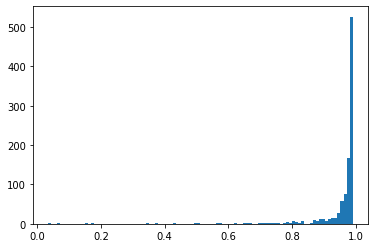

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1752.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:38:38   Log-Likelihood:                 3394.9
No. Observations:                1000   AIC:                            -6646.
Df Residuals:                     928   BIC:                            -6293.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1517      0.023     -6.714      0.0

In [200]:
scores = []
drifts = []
epoch =1000

for i in range(epoch):
    tx = np.random.permutation(true_x)[0:np.random.randint(1,true_x.shape[0],1)[0]]
    fx = false_x #np.random.permutation(false_x)[0:np.random.randint(1,false_x.shape[0],1)[0]]
    ffx = np.concatenate((tx,fx))
    np.random.shuffle(ffx)
    tx = ffx[:,0:81]
    ty = ffx[:,81]
    base_score = precision_recall_fscore_support(ty, ML[2010].predict(scaler.transform(tx)),average='binary')
    #x_ref2 = np.random.permutation(x_ref)[0:tx.shape[0]]
    drift = __ks_drift(x_ref,tx)
    scores.append(base_score[0])
    drifts.append(drift[:,0])
    print(f"\r{i+1}/{epoch} precision:{base_score[0]:.4f} drift:{drift[toplist[0],0]:.4f}", end="", flush=True)

plt.hist(scores, bins = 100)
plt.show()

model = sm.OLS(scores, drifts).fit()
print(model.summary())

## loan predict model의 성능 예측 실험

In [44]:
# 2010년의 data를 기준으로 그 이후의 data 들...
X2 = np.concatenate((X[2011],X[2012],X[2013],X[2014],X[2015],X[2016],X[2017]))
Y2 = np.concatenate((Y[2011],Y[2012],Y[2013],Y[2014],Y[2015],Y[2016],Y[2017]))

In [45]:
print("trainset:",X[2010].shape)
print("online dataset:",X2.shape)

trainset: (11497, 81)
online dataset: (1268183, 81)


In [201]:
result = {}
result['precision'] = []
result['predicted'] = []
window_size = 8000
step = 4000
predicted = 0
batch = math.ceil((X2.shape[0]-window_size)/step)
for i in range(batch):
    ux = X2[i*step:i*step+window_size]
    uy = Y2[i*step:i*step+window_size]
    if scaler is not None:
        f1 = precision_recall_fscore_support(uy, ML[2010].predict(scaler.transform(ux)),average='binary')
    else:
        f1 = precision_recall_fscore_support(uy, ML[2010].predict(ux),average='binary')

    drift = __ks_drift(x_ref,ux)
    precision = f1[0]
    predicted1 = model.predict(drift[:,0])[0]
    if abs(predicted1-predicted) > 0.1 and predicted > 0:
        predicted1 = predicted
    result['precision'].append(precision)
    result['predicted'].append(predicted1)
    print(f"\r{i+1}/{batch} precision:{precision:.4f} predicted:{predicted1:.4f}", end="", flush=True)
    predicted = predicted1

316/316 precision:0.8699 predicted:0.8583

In [202]:
result_df = pd.DataFrame(result)

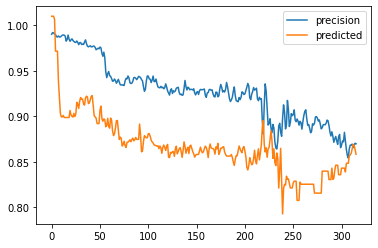

In [203]:
result_df.plot()

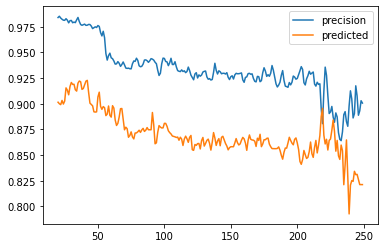

In [204]:
result_df[20:250].plot()

### Error chart

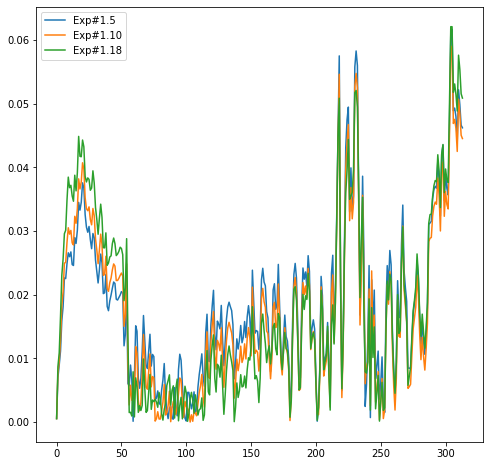

In [ ]:
error_df = pd.DataFrame(erdic)
error_df[['Exp#1.5','Exp#1.10','Exp#1.18']].plot(legend=True, figsize=(8,8))
#error_df.plot(legend=True, figsize=(20,5))

# 8. Credit card transactions 실험


https://www.kaggle.com/datasets/ealtman2019/credit-card-transactions

https://www.kaggle.com/code/vadimabronin/notebookd76fc110c7

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


## 데이터 구축

In [ ]:
!kaggle datasets download "ealtman2019/credit-card-transactions"

 99% 261M/263M [00:02<00:00, 102MB/s]
100% 263M/263M [00:02<00:00, 129MB/s]


In [ ]:
!unzip credit-card-transactions.zip

Archive:  credit-card-transactions.zip
  inflating: User0_credit_card_transactions.csv  
  inflating: credit_card_transactions-ibm_v2.csv  
  inflating: sd254_cards.csv         
  inflating: sd254_users.csv         


In [ ]:
df = pd.read_csv("credit_card_transactions-ibm_v2.csv")

In [ ]:
df['Year'].value_counts()

2019    1723938
2017    1723360
2018    1721615
2016    1708924
2015    1701371
2014    1672343
2013    1650917
2012    1610829
2011    1570551
2010    1491225
2009    1355434
2008    1223460
2007    1064483
2006     908793
2005     746653
2004     597003
2003     466408
2002     350732
2020     336500
2001     257998
2000     177729
1999     118250
1998      78345
1997      49753
1996      29945
1995      20928
1994      14316
1993       8378
1992       5134
1991       1585
Name: Year, dtype: int64

### 데이터 정체 (1/30 로 축소)

In [ ]:
import numpy as np 
import pandas as pd 
import os
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_everything()

In [ ]:
df['Is Fraud?']=df['Is Fraud?'].replace({'No':0,'Yes':1}) 

In [ ]:
df1 = df[df['Is Fraud?']==1]
df2 = df[df['Is Fraud?']==0]
df3 = df2.sample(int(df2.shape[0]/30))
df4 = pd.concat([df1,df3])

print("Compression rate:",df4.shape[0] / df.shape[0] )

df = df4

Compression rate: 0.034512832709364456


### 기타 등등 전처리

In [ ]:
df['Errors?']=df['Errors?'].fillna('NAN')
df['Errors?']=df['Errors?'].apply(lambda value:value=='NAN')
df['Errors?'].value_counts()

True     827624
False     14037
Name: Errors?, dtype: int64

In [ ]:
df['Use Chip'].unique()
df['is online']=df['Use Chip'].apply(lambda value:value=='Online Transaction')

In [ ]:

from sklearn.preprocessing import LabelEncoder
df['Use Chip']=df['Use Chip'].replace({'Swipe Transaction':0, 'Online Transaction':1, 'Chip Transaction':2})
df['Zip'] = df['Zip'].fillna(df['Zip'].mean())  
df['Amount'] = df['Amount'].apply(lambda value: float(value.split("$")[1]))
df['Hour'] = df['Time'].apply(lambda value: int(value.split(":")[0]))
df['Minutes'] = df['Time'].apply(lambda value: int(value.split(":")[1]))
df.drop(['Time'], axis=1, inplace=True)     
df['Merchant State']=df['Merchant State'].fillna('NAN')    
df['Merchant City']=df['Merchant City'].fillna('NAN') 
df['is vozmes']=df['Amount'].apply(lambda value: value<0)  
df['abs_amount']=df['Amount'].apply(lambda value: abs(value))

In [ ]:
#encoding categorial features
le=LabelEncoder() 
df['Merchant State']=le.fit_transform(df['Merchant State'])
le=LabelEncoder()
df['Merchant City']=le.fit_transform(df['Merchant City'])
le=LabelEncoder()
df['Errors?']=le.fit_transform(df['Errors?'])
le=LabelEncoder()
df['is online']=le.fit_transform(df['is online'])
le=LabelEncoder()
df['is vozmes']=le.fit_transform(df['is vozmes'])

In [ ]:
df = df.sort_values(['Year','Month','Day'])

In [ ]:
df.Year.value_counts()

2016    60726
2018    60155
2015    59749
2019    59311
2017    57298
2014    56896
2013    56777
2012    55201
2010    53148
2011    52492
2009    46303
2008    44533
2007    37301
2006    31605
2005    25058
2004    20495
2003    15674
2002    11824
2020    11342
2001     9012
2000     6057
1999     3811
1998     2641
1997     1679
1996      920
1995      683
1994      461
1993      285
1992      159
1991       65
Name: Year, dtype: int64

### dataset 만들기

In [ ]:
drop_columns = ['Is Fraud?','Zip','Year','Month','Day','Minutes','User','Errors?','Merchant Name','Merchant City','Merchant State']
X = df[df['Year']==2007].drop(drop_columns,axis=1)
y = df[df['Year']==2007]['Is Fraud?']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37301 entries, 19831724 to 16154702
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Card        37301 non-null  int64  
 1   Amount      37301 non-null  float64
 2   Use Chip    37301 non-null  int64  
 3   MCC         37301 non-null  int64  
 4   is online   37301 non-null  int64  
 5   Hour        37301 non-null  int64  
 6   is vozmes   37301 non-null  int64  
 7   abs_amount  37301 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 2.6 MB


이러한 데이터는 시계열 데이터는 아니지만, 시간적 특성을 포함하는 데이터로서
testset을 나눌때 shuffle 없이 7:3으로 나눈다.

In [ ]:
X.shape

(37301, 8)

In [ ]:
offset = int(y.values.shape[0] * 0.7)
y_ref = y.values[0:offset]
x_ref = X.values[0:offset]
y_inf = y.values[offset:]
x_inf = X.values[offset:]

In [ ]:
x_ref.shape[0] + x_inf.shape[0]

37301

## 예측모델 구축

### Catboost 모델 

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


### Credit card fraud transaction detect model build

In [ ]:
#cat boost classifier

from catboost import CatBoostClassifier

seed_everything()

cat = CatBoostClassifier()
cat.fit(x_ref, y_ref,plot=False) 
y_pred=cat.predict(x_inf)
print(classification_report(y_inf, y_pred))  

Learning rate set to 0.041487
0:	learn: 0.6216151	total: 53.9ms	remaining: 53.9s
1:	learn: 0.5551103	total: 61.6ms	remaining: 30.7s
2:	learn: 0.4986417	total: 68.9ms	remaining: 22.9s
3:	learn: 0.4565464	total: 76.6ms	remaining: 19.1s
4:	learn: 0.4136850	total: 88.1ms	remaining: 17.5s
5:	learn: 0.3820252	total: 94.2ms	remaining: 15.6s
6:	learn: 0.3484819	total: 100ms	remaining: 14.2s
7:	learn: 0.3184745	total: 110ms	remaining: 13.6s
8:	learn: 0.2939070	total: 122ms	remaining: 13.4s
9:	learn: 0.2715727	total: 136ms	remaining: 13.5s
10:	learn: 0.2529872	total: 146ms	remaining: 13.1s
11:	learn: 0.2348952	total: 154ms	remaining: 12.7s
12:	learn: 0.2241845	total: 165ms	remaining: 12.5s
13:	learn: 0.2115322	total: 179ms	remaining: 12.6s
14:	learn: 0.2029825	total: 188ms	remaining: 12.3s
15:	learn: 0.1922771	total: 214ms	remaining: 13.1s
16:	learn: 0.1826835	total: 221ms	remaining: 12.8s
17:	learn: 0.1743241	total: 228ms	remaining: 12.4s
18:	learn: 0.1673404	total: 236ms	remaining: 12.2s
19:	l

In [ ]:
from sklearn.metrics import f1_score,roc_auc_score
print(f1_score(y_inf, y_pred)) 
print(roc_auc_score(y_inf, y_pred))

0.6974789915966385
0.7759890977827133


## Credit card fraud transaction detect model 성능 예측 실험

In [ ]:
df1 = df[df['Year'] >= 2008]
df2 = df1[df1['Year'] <= 2009]

X_test2 = df2[df2['Year'] >= 2008].drop(drop_columns,axis=1)
y_test2 = df2[df2['Year'] >= 2008]['Is Fraud?']

In [ ]:
y_pred=cat.predict(x_inf)
print(classification_report(y_inf, y_pred))  

base_score = precision_recall_fscore_support(y_inf, y_pred,average='binary')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10294
           1       0.94      0.56      0.70       897

    accuracy                           0.96     11191
   macro avg       0.95      0.78      0.84     11191
weighted avg       0.96      0.96      0.96     11191



In [ ]:
base_score

(0.9378531073446328, 0.5551839464882943, 0.6974789915966385, None)

In [ ]:

print("trainset:",X.shape)
print("online dataset:",X_test2.shape)

trainset: (37301, 8)
online dataset: (90836, 8)


In [ ]:
COLUMNS = X.columns

In [ ]:
COLUMNS

Index(['Card', 'Amount', 'Use Chip', 'MCC', 'is online', 'Hour', 'is vozmes',
       'abs_amount'],
      dtype='object')

In [ ]:
importances = cat.feature_importances_

### Error chart

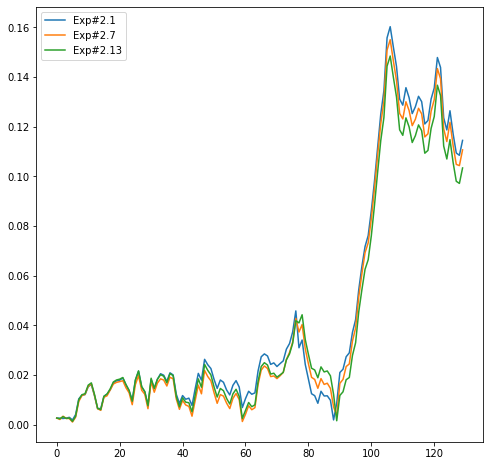

In [ ]:
error_df = pd.DataFrame(erdic)
error_df[['Exp#2.1','Exp#2.7','Exp#2.13']].plot(legend=True, figsize=(8,8))
#error_df.plot(legend=True, figsize=(20,5))